In [41]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook


import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
X = np.load('../data/processed_data/m4015_session2/X.npy')
y = np.load('../data/processed_data/m4015_session2/y.npy')
y2 = np.load('../data/processed_data/m4015_session2/y2.npy')
time  = np.load('../data/processed_data/m4015_session2/time.npy')

<IPython.core.display.Javascript object>


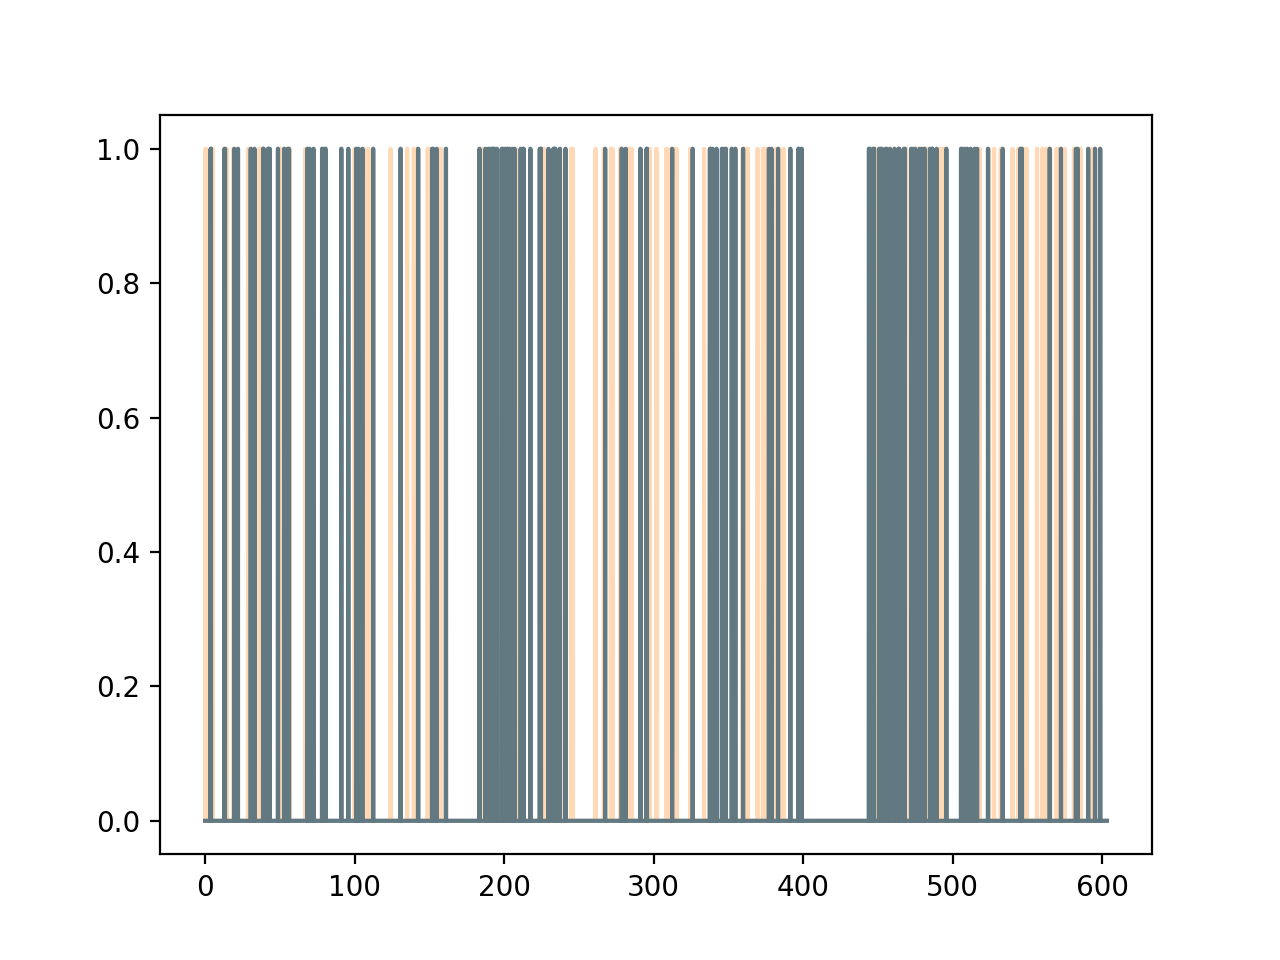

In [43]:
plt.figure()
# plt.plot(time, X)
plt.plot(time, y)
plt.plot(time, y2, alpha=0.3)
plt.show()

In [44]:
z = np.load('../data/processed_data/m4015_session2/true_array.npy')